In [36]:
import numpy as np

In [89]:
import math

In [37]:
import matplotlib.pyplot as plt

In [86]:
def func(x):
    return np.sin(x ** 2) ** 3

def first_der(x):
    return 6 * x * np.cos(x ** 2) * (np.sin(x ** 2) ** 2)

def second_der(x):
    return (6 * np.sin(x ** 2) * (np.sin(x ** 2) * np.cos(x ** 2) + 4 * (x ** 2) * (np.cos(x ** 2) ** 2) - 2 * (x ** 2) * (np.sin(x ** 2) ** 2)))

In [115]:
def divided_diff_extended(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return values[np.argmax(nodes == nodes[l]) + r - l] / math.factorial(r-l)
    return (divided_diff_extended(nodes, values, l+1, r) - divided_diff_extended(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])

In [116]:
def hermite(nodes, values, x):
    res = 0
    mult = 1
    for i in range(len(nodes)):
        res += divided_diff_extended(nodes, values, 0, i) * mult
        mult *= x - nodes[i]
    return res

In [117]:
nodes = np.array([np.pi/6, np.pi/6, np.pi/5, np.pi/5, np.pi/5])

In [118]:
values = np.array([func(np.pi/6), first_der(np.pi/6), func(np.pi/5), first_der(np.pi/5), second_der(np.pi/5)])

In [119]:
x_axis = np.linspace(nodes.min(), nodes.max(), 300)

In [120]:
y_axis = hermite(nodes, values, x_axis)

In [123]:
nodes = np.array([np.pi/6, np.pi/6, np.pi/5, np.pi/5, np.pi/5])
values = np.array([func(nodes[0]), first_der(nodes[1]), func(nodes[2]), first_der(nodes[3]), second_der(nodes[4])])

x_axis = np.linspace(nodes.min(), nodes.max(), 1000)

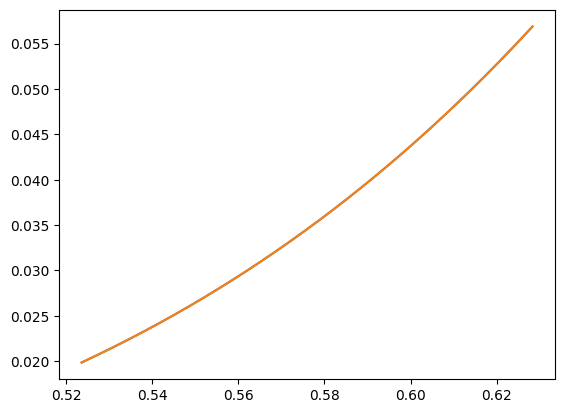

In [126]:
plt.plot(x_axis, func(x_axis), style = ')
plt.plot(x_axis, hermite(nodes, values, x_axis))
plt.show()